# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **The objective:**

 - Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

### **The key questions:**

- What is the optimum pricing model for used_cars in india?

### **The problem formulation**:

- This a price prediction problem, which translates to Regression Problem that is to be solved using Machine Learning tools 

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
#import libraries
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# For tuning the model

from sklearn.model_selection import GridSearchCV


### **Let us load the data**

In [4]:
#load dataset
df=pd.read_csv('used_cars.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
#check head of dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [7]:
#check Tail of dataset
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [8]:
df.shape

(7253, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:**
    -The data has 7253 rows and 14 columns.
    -Of great concern is, Over six variables have missing values with the varible New_price having the highest number 
     of quantity of missing values. 
    -The dataset is composed of numerical columns and 5 categorical columns 
    -The target variable is Price.

In [11]:
#Summary Statistics
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations:**
- The target variable 'Price' has a mean of 9.479468 and a max of160 and a min of 0.44.
- The variable year has a mean of 2013 and a max of 2019. 
- The variable Kilometers driven has a mean of 5.869906e+04 and a max of 6.500000e+06.
- The variable mileage has a mean of 18.141580 and a max of 33.540000. 
- The variable Engine has a mean of 1616.5734700 and a max of 5998.000000.
- The variable Power has a mean of 112.765214 and a max of 616.000000. 
- The variable Seats has a mean of 5 and a max of 10 and a min of 2.
- The variable New_price has a mean of 22.779692 and a max of 375 and a min of 3.910000.

In [12]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

In [13]:
df = df.drop(['S.No.'],axis = 1)

**Obervations:**
    -The feature S.NO has all unique outcomes this means we drop that column it will not be useful to our analysis  

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [14]:
# Creating numerical columns
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price',
          'Price']
# Creating categorical variables 
cat_cols = ['Name','Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

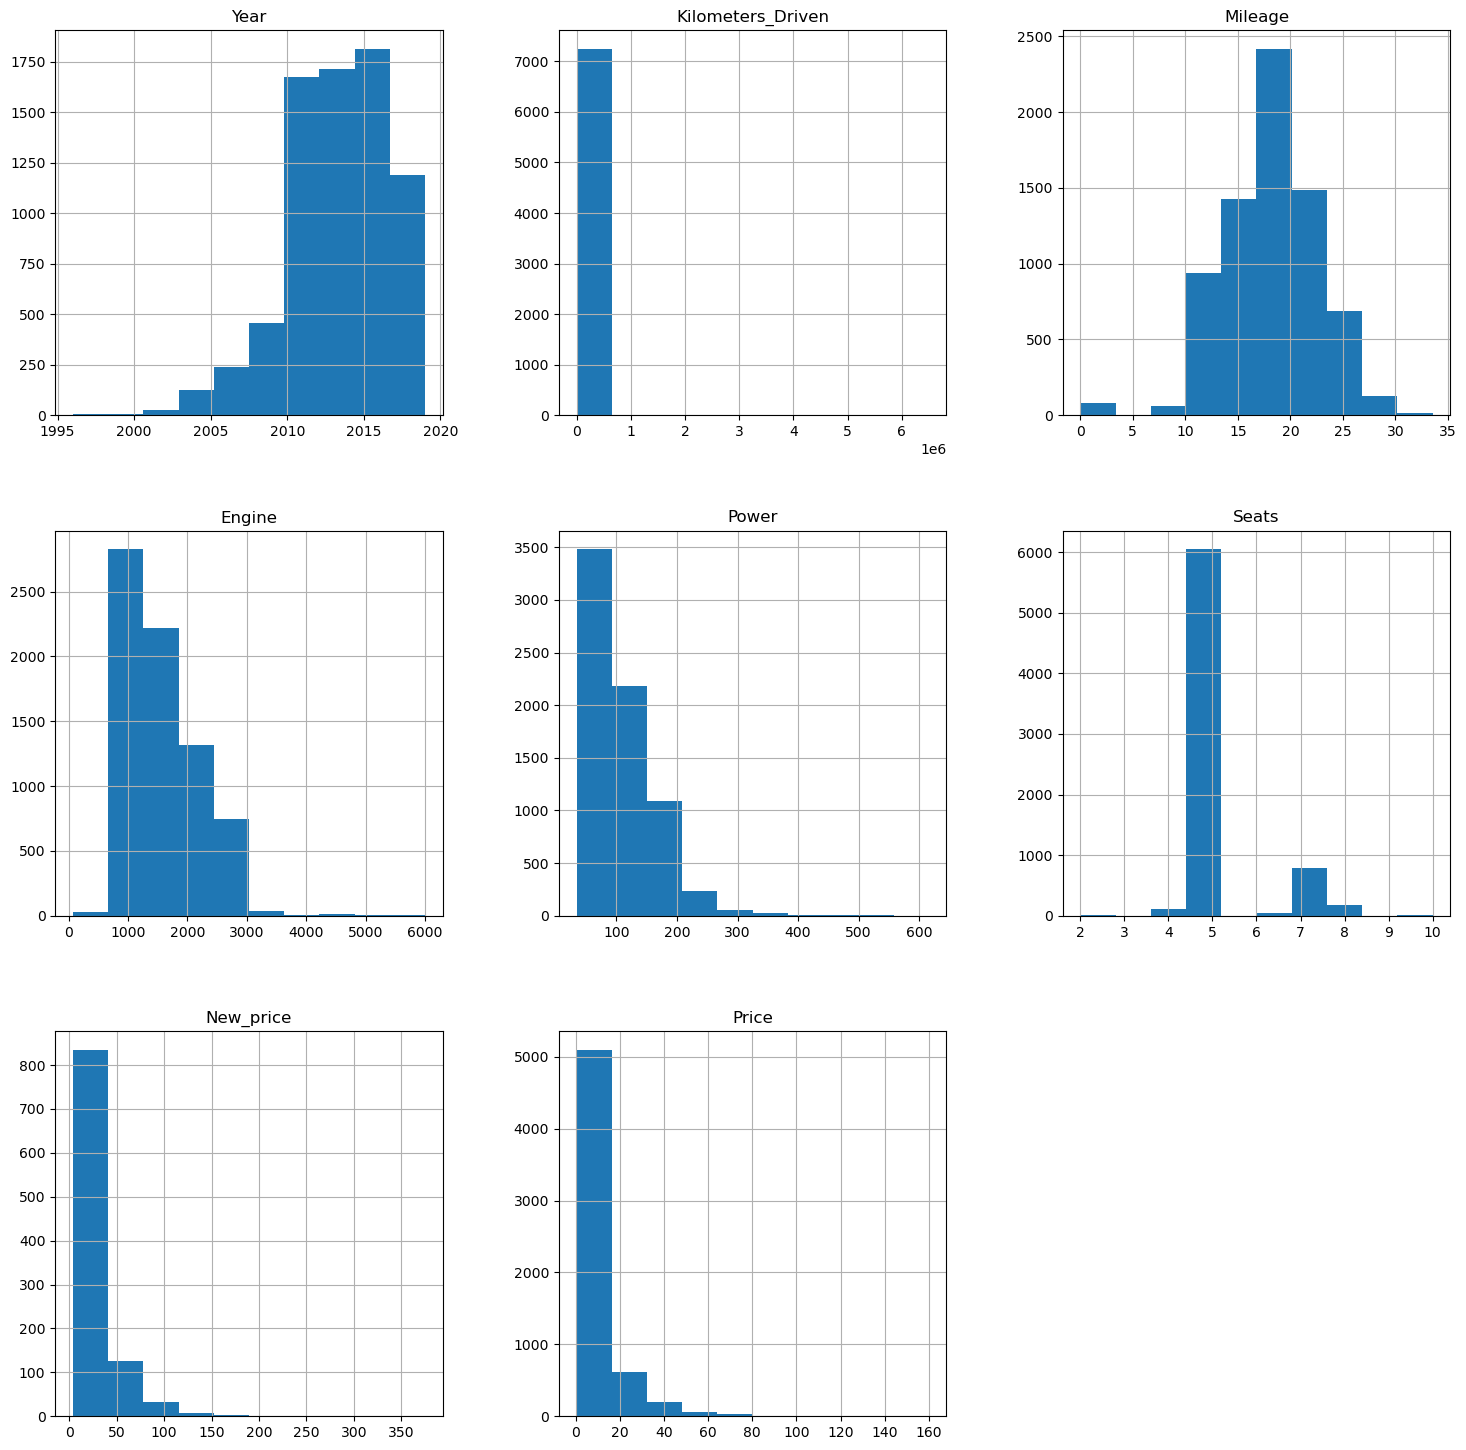

In [15]:
df[num_cols].hist(figsize = (18, 18))

plt.show()

**Observations:**
   - Except for mileage the rest of the numerical variables are skwed to the right. 
   - Year of Manufacture is left skewwed which indicates most used vehicles where manufactured after 2010. -

In [16]:
for i in cat_cols:
    print(df[i].value_counts(normalize = True))
    
    print('*' * 50)

Mahindra XUV500 W8 2WD                  0.007583
Maruti Swift VDI                        0.006756
Maruti Swift Dzire VDI                  0.005791
Honda City 1.5 S MT                     0.005377
Maruti Swift VDI BSIV                   0.005101
                                          ...   
Chevrolet Beat LT Option                0.000138
Skoda Rapid 1.6 MPI AT Elegance Plus    0.000138
Ford EcoSport 1.5 TDCi Ambiente         0.000138
Hyundai i10 Magna 1.1 iTech SE          0.000138
Hyundai Elite i20 Magna Plus            0.000138
Name: Name, Length: 2041, dtype: float64
**************************************************
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
**************************************************
Diesel      0.531091
Petrol      0

<AxesSubplot:xlabel='logKilometers_Driven', ylabel='Count'>

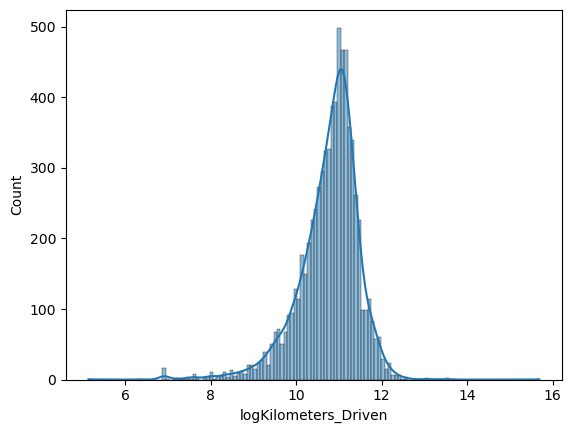

In [17]:
df['logKilometers_Driven'] = np.log(df['Kilometers_Driven'])
sns.histplot(data = df, x ='logKilometers_Driven', kde = True)

**Observations**
- The distribution is normal with a slight skew to the right.

<AxesSubplot:xlabel='log_Price', ylabel='Count'>

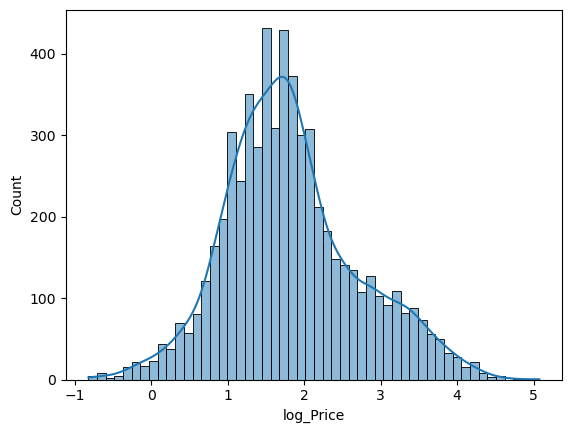

In [18]:
df['log_Price'] = np.log(df['Price'])
sns.histplot(data = df, x = 'log_Price', kde = True)

**Observations**
- The distribution is normal with a slight skew to the right .

<AxesSubplot:xlabel='log_New_Price', ylabel='Count'>

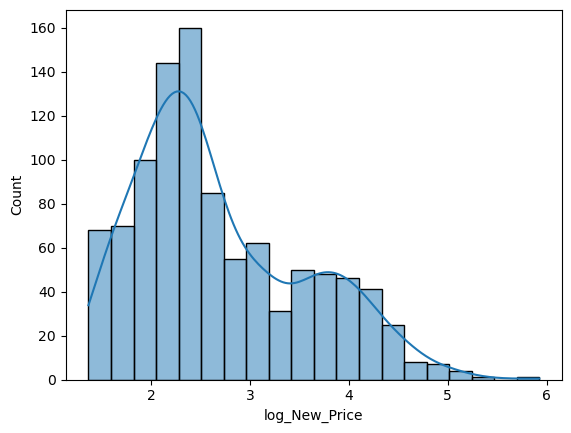

In [20]:
df['log_New_Price'] = np.log(df['New_price'])
sns.histplot(data = df, x = 'log_New_Price', kde = True)

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

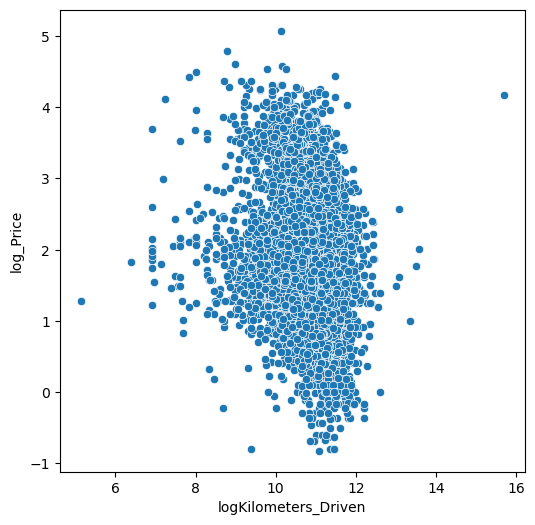

In [21]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x ='logKilometers_Driven' , y ='log_Price' , data = df)
plt.show()

**Observations:**
-There is no observable conclusive relationship between the two variables.

<AxesSubplot:>

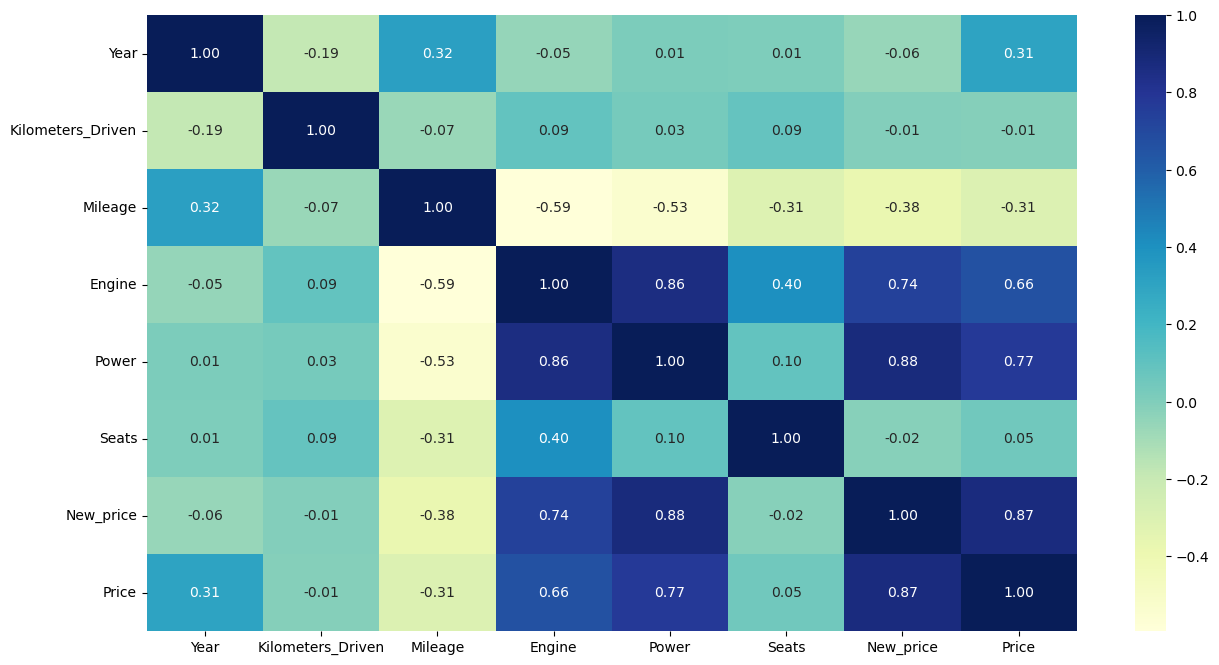

In [22]:
# Plotting the correlation heatmap  between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations:** 
- There is a high correlation between the target variable 'Price' and the variables Engine, Power and New_price. 
- A negative correlation between price and mileage
- Between variables there is a high correlation between power, Engine and New_price. 
- Also noticeable is the high negative correlation between Engine and Power

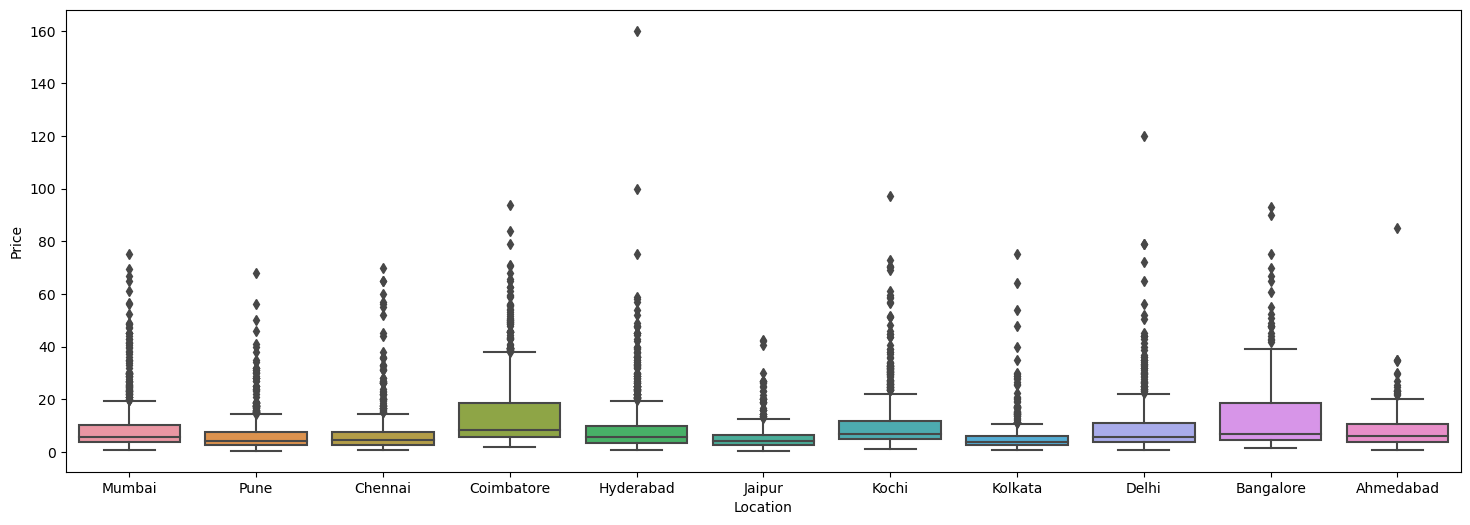

In [23]:
fig = plt.figure(figsize = (18, 6))

sns.boxplot(x = 'Location', y = 'Price', data =df);

**Observations**:
- Vehicles that are in Coimbatore, Kochi, Delhi and Bangalore have a higher mean than the rest which means vehicles in 
  this found in this locations fetch higher prices, outliers are present and mean is ordinarily affect by outliers. 
- This could also mean there is a high demand for used cars in this locations.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [24]:
df["Name"].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

### **Missing value treatment**

In [25]:
(df.isnull().sum() / df.shape[0])*100 #checking percentage of missing values

Name                     0.000000
Location                 0.000000
Year                     0.000000
Kilometers_Driven        0.000000
Fuel_Type                0.000000
Transmission             0.000000
Owner_Type               0.000000
Mileage                  0.027575
Engine                   0.634220
Power                    2.412795
Seats                    0.730732
New_price               86.129877
Price                   17.013650
logKilometers_Driven     0.000000
log_Price               17.013650
log_New_Price           86.129877
dtype: float64

In [26]:
#fill missing values 
df.fillna({"Mileage":df['Mileage'].mean(),"Engine": df['Engine'].mean(),"Power": df['Power'].mean(),"Seats":df['Seats'].median(),"Price":df['Price'].median(),'log_Price':df['log_Price'].median()},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  7253 non-null   object 
 1   Location              7253 non-null   object 
 2   Year                  7253 non-null   int64  
 3   Kilometers_Driven     7253 non-null   int64  
 4   Fuel_Type             7253 non-null   object 
 5   Transmission          7253 non-null   object 
 6   Owner_Type            7253 non-null   object 
 7   Mileage               7253 non-null   float64
 8   Engine                7253 non-null   float64
 9   Power                 7253 non-null   float64
 10  Seats                 7253 non-null   float64
 11  New_price             1006 non-null   float64
 12  Price                 7253 non-null   float64
 13  logKilometers_Driven  7253 non-null   float64
 14  log_Price             7253 non-null   float64
 15  log_New_Price        

**Observations**
- Here fillna method is used to fill the missing values in various columns using mean and median to conntrate the data around     the measures so that outliers are not introduced into various variables.


In [27]:
df=df.drop(columns={'Name','New_price','log_New_Price'},axis=1)
#Encording the data 
df= pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       7253 non-null   int64  
 1   Kilometers_Driven          7253 non-null   int64  
 2   Mileage                    7253 non-null   float64
 3   Engine                     7253 non-null   float64
 4   Power                      7253 non-null   float64
 5   Seats                      7253 non-null   float64
 6   Price                      7253 non-null   float64
 7   logKilometers_Driven       7253 non-null   float64
 8   log_Price                  7253 non-null   float64
 9   Location_Bangalore         7253 non-null   uint8  
 10  Location_Chennai           7253 non-null   uint8  
 11  Location_Coimbatore        7253 non-null   uint8  
 12  Location_Delhi             7253 non-null   uint8  
 13  Location_Hyderabad         7253 non-null   uint8

**Observation**
- We have to drop var name because it has a large percentage of unique values
- The var new price and var log price have to be dropped because of the high percentage 
  of non values so it may not be very useful in our analysis.
- We also have use get-dummies method to transform the categorical variables into numerical variables so that we
  can use the variables while perfoming numerial data analysis.

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [28]:
Y=df['log_Price']
X=df.drop(columns={'Engine','Fuel_Type_Diesel','Fuel_Type_Electric','Fuel_Type_Petrol','Price','log_Price','Kilometers_Driven'},axis=1)
# Add the intercept term
X = sm.add_constant(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      7253 non-null   float64
 1   Year                       7253 non-null   int64  
 2   Mileage                    7253 non-null   float64
 3   Power                      7253 non-null   float64
 4   Seats                      7253 non-null   float64
 5   logKilometers_Driven       7253 non-null   float64
 6   Location_Bangalore         7253 non-null   uint8  
 7   Location_Chennai           7253 non-null   uint8  
 8   Location_Coimbatore        7253 non-null   uint8  
 9   Location_Delhi             7253 non-null   uint8  
 10  Location_Hyderabad         7253 non-null   uint8  
 11  Location_Jaipur            7253 non-null   uint8  
 12  Location_Kochi             7253 non-null   uint8  
 13  Location_Kolkata           7253 non-null   uint8

**Observations:**
- The relevant features are no null this means that our data is clean and ready for modelling
- Columns Engine, fuel type diesel, fuel type electric, fuel type petrol, kilometers driven are droped to 
  remove  multicolinearity.

In [29]:
#split the data 
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [30]:
# Checking the shape of the train and the test data

print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

Shape of Training set :  (5077, 21)
Shape of test set :  (2176, 21)


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                      feature            VIF
0                       const  808992.732300
1                        Year       2.073377
2                     Mileage       1.873453
3                       Power       2.049600
4                       Seats       1.282344
5        logKilometers_Driven       1.551085
6          Location_Bangalore       2.487418
7            Location_Chennai       3.034842
8         Location_Coimbatore       3.516100
9              Location_Delhi       3.259394
10         Location_Hyderabad       3.821868
11            Location_Jaipur       2.761770
12             Location_Kochi       3.469582
13           Location_Kolkata       3.097706
14            Location_Mumbai       4.085354
15              Location_Pune       3.513892
16              Fuel_Type_LPG       1.006158
17        Transmission_Manual       1.800816
18  Owner_Type_Fourth & Above       1.009323
19          Owner_Type_Second       1.185295
20           Owner_Type_Third       1.112301


**Observations:**
    -The features variance inflation factors have coeff that are below 4.0 and above 1.0. 
    -Features No. 17 and No.16 are insignificant since they are very close to zero.

In [32]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default, we need to add it explicitly
x_train1 = sm.add_constant(X_train)

# Add constant to the test data
x_test1 = sm.add_constant(X_test)

# Create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     602.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:41:49   Log-Likelihood:                -2894.6
No. Observations:                5077   AIC:                             5831.
Df Residuals:                    5056   BIC:                             5968.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observation:**
- Some features seem to be insignificant but removing them would destabilizes the model since some information will be lost.  

In [33]:
#check residuals
residuals = olsmodel1.resid

np.mean(residuals)

-4.0617379243108585e-13

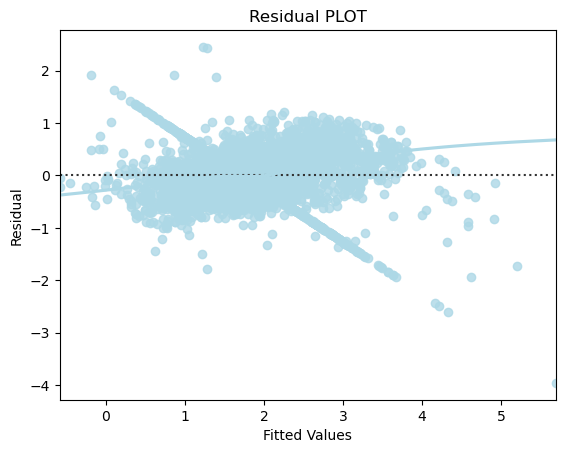

In [34]:
#check for linearity 
# Predicted values
fitted = olsmodel1.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x =fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

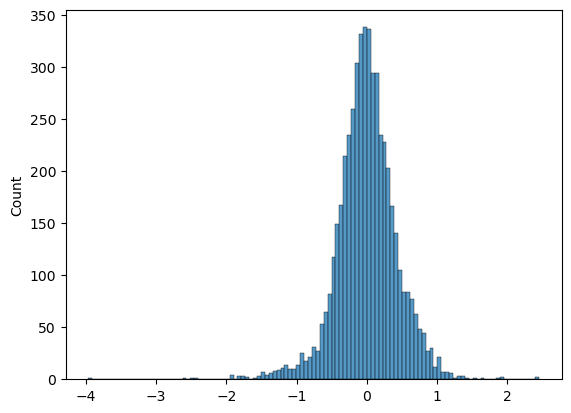

In [35]:
# Plot histogram of residuals
# Write your code here
sns.histplot(residuals);

**Observations:** 
- The spread is normal concentrated around point zero.
- The assuptions of the model generally hold.

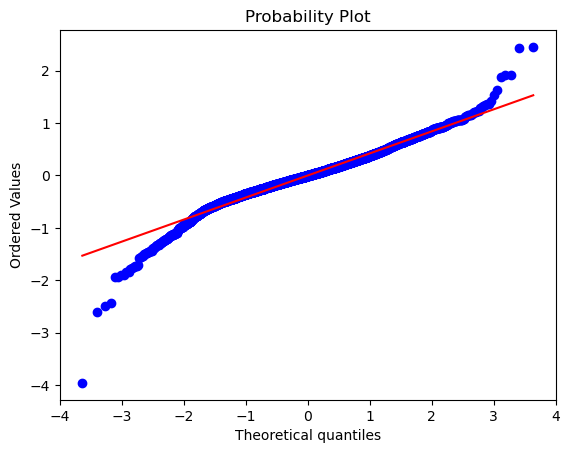

In [36]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:** 
- The residuals are largely fitting along the regression line.

In [37]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)  

    Data      RMSE       MAE  MAPE
0  Train  0.427925  0.313877   inf
1   Test  0.421362  0.309674   inf


**Observations:**
    The mean percent error in close to zero but misbehaves, as it recurr to infinity.
    The model perform generally on the training ans the test data the error margins are low.

In [38]:
#Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    
#linearregression=linearregression.fit
linearregression=linearregression.fit(X_train, y_train)
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

cv_Score13 = cross_val_score(linearregression, X_test, y_test, cv = 10)
cv_Score14 = cross_val_score(linearregression, X_test, y_test, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score13.mean(), cv_Score13.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score13.mean(), cv_Score13.std() * 2))

RSquared: 0.698 (+/- 0.068)
Mean Squared Error: 0.186 (+/- 0.039)
RSquared: 0.730 (+/- 0.126)
Mean Squared Error: -0.730 (+/- 0.126)


**Observations:**
- The model is perfoming better on the test dataset compared to the training dataset.
- The error marging is also very small

In [39]:
pd.DataFrame(linearregression.coef_, X.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)

,coef
Year,0.104939
Location_Hyderabad,0.099211
Location_Bangalore,0.095993
Seats,0.092731
Location_Coimbatore,0.058835
Owner_Type_Fourth & Above,0.024570
Location_Chennai,0.015492
Power,0.008305
const,0.000000
logKilometers_Driven,-0.001324


In [52]:
# ridge regression
rr = Ridge(alpha=0.01)
#fitting
rr.fit(X_train, y_train) 
#perfomance 
pred_train_rr= rr.predict(X_train)
print('mean_squared_error_train',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('r-squared_train',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('mean_squared_error_test',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('r-squared_test',r2_score(y_test, pred_test_rr))

mean_squared_error_train 0.427924618803787
r-squared_train 0.7043997769077857
mean_squared_error_test 0.42136169560106357
r-squared_test 0.7356924227687563


### **Hyperparameter Tuning: Decision Tree**

In [61]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

pred_train_DT= dt_regressor.predict(X_train)
print('mean_squared_error_train',np.sqrt(mean_squared_error(y_train,pred_train_DT)))
print('r-squared_train',r2_score(y_train, pred_train_DT))# Model Performance on test data i.e prediction

pred_test_DT= rr.predict(X_test)
print('mean_squared_error_test',np.sqrt(mean_squared_error(y_test,pred_test_DT)))
print('r-squared_test',r2_score(y_test, pred_test_DT))


mean_squared_error_train 0.011936498715774898
r-squared_train 0.9997700019659315
mean_squared_error_test 0.42136169560106357
r-squared_test 0.7356924227687563


In [63]:
# Choose the type of regressor 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8), 
              
              'criterion': ['squared_error', 'friedman_mse'],
              
              'min_samples_leaf': [1, 3, 5, 7],
              
              'max_leaf_nodes': [2, 5, 7] + [None]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train,y_train)

# Set the dtree_tuned_regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_

dtree_tuned_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=7, random_state=1)

**Feature Importance**

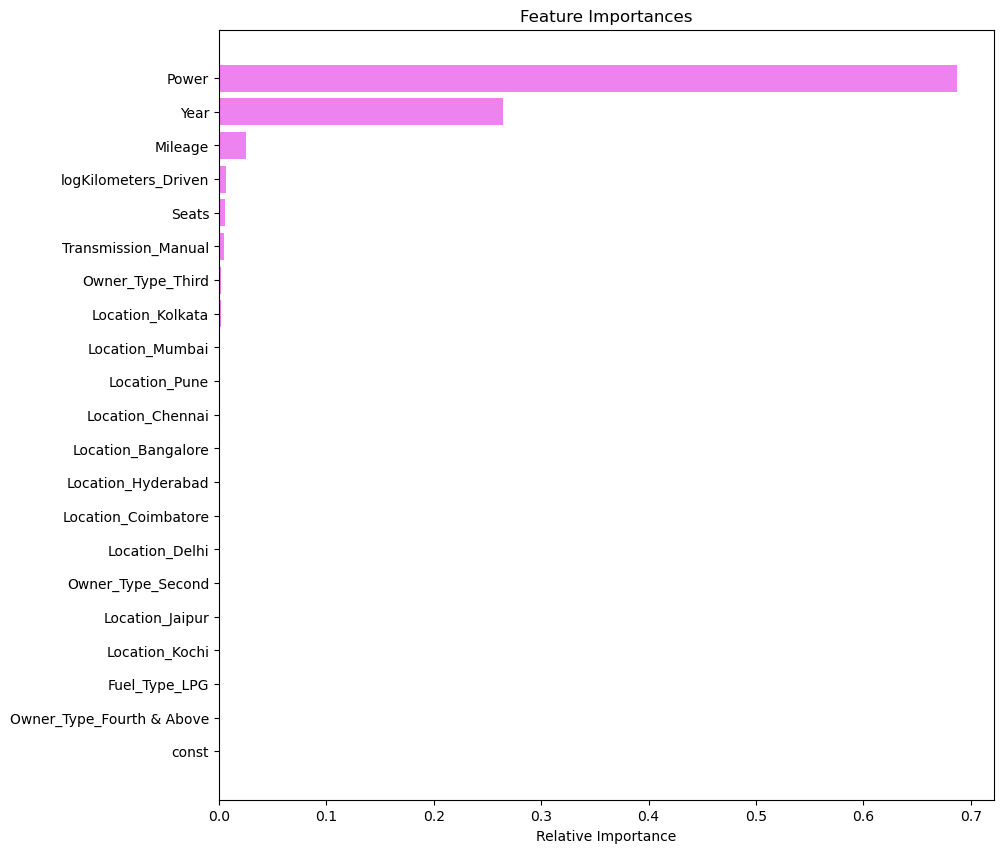

In [64]:
# Plotting the feature importance
features = list(X.columns)

importances = dtree_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Hyperparameter Tuning: Random Forest**

In [65]:
# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
regressor.fit(X_train, y_train)

# Model Performance on the test data
pred_train_RF= regressor.predict(X_train)
print('mean_squared_error_train',np.sqrt(mean_squared_error(y_train,pred_train_RF)))
print('r-squared_train',r2_score(y_train, pred_train_RF))
# Model Performance on test data i.e prediction

pred_test_rfTest= regressor.predict(X_test)
print('mean_squared_error_test',np.sqrt(mean_squared_error(y_test,pred_test_rfTest))) 
print('r-squared_test',r2_score(y_test,pred_test_rfTest))

mean_squared_error_train 0.15399256616890664
r-squared_train 0.9617201942752871
mean_squared_error_test 0.398839166561482
r-squared_test 0.7631926881460812


**Feature Importance**

In [66]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [84]:
print('LINEAR REGERESSION PERFOMANCE')
print('TRAIN')
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))
print('TEST')
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score13.mean(), cv_Score13.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score13.mean(), cv_Score13.std() * 2))

print('RIDGE REGERESSION PERFOMANCE')
print('TRAIN')
print('mean_squared_error_train',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('r-squared_train',r2_score(y_train, pred_train_rr))
print('TEST')
print('mean_squared_error_test',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('r-squared_test',r2_score(y_test, pred_test_rr))
print('DECISION TREE PERFOMANCE')
print('TRAIN')
print('mean_squared_error_train',np.sqrt(mean_squared_error(y_train,pred_train_DT)))
print('r-squared_train',r2_score(y_train, pred_train_DT))# Model Performance on test data i.e prediction
print('TEST')
print('mean_squared_error_test',np.sqrt(mean_squared_error(y_test,pred_test_DT))) 
print('r-squared_test',r2_score(y_test, pred_test_DT))
print('RANDOM fOREST PERFOMANCE')
print('TRAIN')
print('mean_squared_error_train',np.sqrt(mean_squared_error(y_train,pred_train_RF)))
print('r-squared_train',r2_score(y_train, pred_train_RF))
print('TEST')
print('mean_squared_error_test',np.sqrt(mean_squared_error(y_test,pred_test_rfTest))) 
print('r-squared_test',r2_score(y_test,pred_test_rfTest))

LINEAR REGERESSION PERFOMANCE
TRAIN
RSquared: 0.698 (+/- 0.068)
Mean Squared Error: 0.186 (+/- 0.039)
TEST
RSquared: 0.730 (+/- 0.126)
Mean Squared Error: -0.730 (+/- 0.126)
RIDGE REGERESSION PERFOMANCE
TRAIN
mean_squared_error_train 0.427924618803787
r-squared_train 0.7043997769077857
TEST
mean_squared_error_test 0.42136169560106357
r-squared_test 0.7356924227687563
DECISION TREE PERFOMANCE
TRAIN
mean_squared_error_train 0.011936498715774898
r-squared_train 0.9997700019659315
TEST
mean_squared_error_test 0.42136169560106357
r-squared_test 0.7356924227687563
RANDOM fOREST PERFOMANCE
TRAIN
mean_squared_error_train 0.15399256616890664
r-squared_train 0.9617201942752871
TEST
mean_squared_error_test 0.398839166561482
r-squared_test 0.7631926881460812


**Observations:** 
- The best performing model is linear regression it performs generally in the trainning model with low error margin, the model shows an improved performance on  the test dataset.
- Ridge regression comes second to linear regression performs generally on the traing dataset and pperfomance improves on the test dataset.
- The Decision Tree model is overfitting it performs extremely well on the training set but it peformance deteriorates significant accompanied by an increase in the error margin on the test dataset. 
- Random forest exibits a similar phenomena as Decision Tree since it is showing signs of overfitting. 


**Summary:** 
- The main objective of this analysis is to Come up with a pricing model that can effectively predict the price of used cars     and can help the business in devising profitable strategies using differential pricing.
- We started by loading the neccessary libraries pandas, numpy, seaborn, matplotlib, sklearn among others
- Loaded the used_car dataset which is in CSV format.
- Did a summary data analysis using methods such as head(),tail(),info(), shape and describe() to gain more insights about the   data structure.
- We noticed that the dataset had alot of missing values which required treatment before analysis could be conducted.
- Began by dropping column S.NO which had all values that were unique.
- Then we split the data into numerical and categorical columns so as to perform the univariate analysis separately.
- Developed a histogram using seaborn library to understand the structures of the numerical columns.
- Using for loop and value_counts method  to understand the structure of the categorical columns.
- a correlation heatmap was also developed using seaborn to see how the values interact among each other.
- Columns; Engine, fuel type diesel, fuel type electric, fuel type petrol and kilometers driven are dropped to 
  remove multicolinearity.
- Columns Name and price and log price are dropped too.
- The data is split 60:40 into training and test sets respectively.
- An ordinary least squares model is built fitted trained and tested this will give us more insight into the nature of 
  linear regression model that is to be built.
- The model looks generalised with optimal complexity it has R-square of over 0.7 and a p-value of less than 0.05 
  the  conditionining is close to zero we also check of the assumptions also hold.
- Then we bulid a linear regression model check the perfomance of the training and test set then we cross validate and 
  test  perfomance in each case the model looks generalised perfoming better on the test set compared to the training 
  with minimal error.
- Then we build a regression model and test it, it shows a better perfomance on the test set compared to the training set 
  but the error margin is abit wide compared to the linear regression model.
- We further develop a Decision tree model we observe the model is overfitting performing better on the train  
  dataset compared to the test set after tuning the hypeparameter using grid search cross validation.
- finally a random forest model is builtand perfomance testing  the model overfits too
- As a result we conclude that the best model to adopt is the linear regression model, because its generalised and gives 
  a better perfomance on the test set with minimal error.




**3. Proposal for the final solution design:** 
- The best solution design should be one that meets the overall objective with minimal risk. The risk to our model is
  basically the error margin that is in the model. Linear regression model minimises the risk while showing a 
  generalised perfomance. This model will maximise profitability and help grow the used car market in india since pricing 
  of the used motor vehicles will be more predictable and the company can use the model to source for used cars that are 
  relevant  for the indian market there by meeting the demand of its customers.
- There is also need to incorporate more relevant data about other areas that affect the business so that a broad picture 
  is developed that can help the business to be more stable and prifitable.
- The model proposed linear regression  is reccomended for adoption by management for implementation since it presents a 
  more robust and all inclusive pricing model. 